In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files

uploaded = files.upload()


Saving Data_Train.xlsx to Data_Train (1).xlsx
Saving Test_set.xlsx to Test_set (1).xlsx


In [3]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")

In [4]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train.describe()
#we see that all features except Price are object dtypes

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Checking for NaN entries

In [9]:
train.isna().values.any()

True

In [10]:
train.isna().sum()
#as we have only two records with NA, we can drop these record 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train.dropna(inplace=True)

In [12]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train.shape

(10682, 11)

# EDA

#### Checking for duplicate values

In [14]:
# Checking if there are any Duplicate values
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [15]:
# Drop duplicates value
train.drop_duplicates(keep='first',inplace=True)

In [16]:
train.shape

(10462, 11)

#### Datetime analysis

In [17]:
train['JourneyDate']=pd.to_datetime(train.Date_of_Journey).dt.day
train['JourneyMonth']=pd.to_datetime(train.Date_of_Journey).dt.month
#as the dataset contains is collected for year 2019, we dont need a year feature as it is same for all

#dropping Date_of_Journey Feature
train.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
#Similarly datetime analysis for Departure and Arival

train['DepartureHour']=pd.to_datetime(train.Dep_Time).dt.hour
train['DepartureMin']=pd.to_datetime(train.Dep_Time).dt.minute

train['ArrivalMin']=pd.to_datetime(train.Arrival_Time).dt.minute
train['ArrivalHour']=pd.to_datetime(train.Arrival_Time).dt.hour

In [19]:
train[['Dep_Time','DepartureHour','DepartureMin']]

,Dep_Time,DepartureHour,DepartureMin
0,22:20,22,20
1,05:50,5,50
2,09:25,9,25
3,18:05,18,5
4,16:50,16,50
...,...,...,...
10678,19:55,19,55
10679,20:45,20,45
10680,08:20,8,20
10681,11:30,11,30


In [20]:
train[['Arrival_Time','ArrivalHour','ArrivalMin']]

,Arrival_Time,ArrivalHour,ArrivalMin
0,01:10 22 Mar,1,10
1,13:15,13,15
2,04:25 10 Jun,4,25
3,23:30,23,30
4,21:35,21,35
...,...,...,...
10678,22:25,22,25
10679,23:20,23,20
10680,11:20,11,20
10681,14:10,14,10


In [21]:
train.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

#### Converting Duration into minutes

In [22]:
#we will split Duration feature and get a list with two values 
#first value will be h and second value will be minute
#we'll replace h and m with '', for converting these features into int
def convert_DurationTo_Hour(x):
    #if we received string with m in it that means hour was 0    
    if 'm' in x:
        return 0
    else:
        return x.replace('h','')
train['DurationHour']=train.Duration.str.split(" ").str[0].apply(convert_DurationTo_Hour).astype(int)

train['DurationMinutes']=train.Duration.str.split(" ").str[1].str.replace('m','')
# DurationMinutes will have Nan features for those records where Minutes were 0
#so we can fill those values with 0
train.DurationMinutes.fillna(0,inplace=True)
train.DurationMinutes=train.DurationMinutes.astype(int)

train['Total_Duration']=(train.DurationHour*60)+train.DurationMinutes

In [23]:
train[['Duration','DurationHour','DurationMinutes','Total_Duration']]

,Duration,DurationHour,DurationMinutes,Total_Duration
0,2h 50m,2,50,170
1,7h 25m,7,25,445
2,19h,19,0,1140
3,5h 25m,5,25,325
4,4h 45m,4,45,285
...,...,...,...,...
10678,2h 30m,2,30,150
10679,2h 35m,2,35,155
10680,3h,3,0,180
10681,2h 40m,2,40,160


In [24]:
train.drop(['Duration','DurationHour','DurationMinutes'],axis=1,inplace=True)

In [25]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,JourneyDate,JourneyMonth,DepartureHour,DepartureMin,ArrivalMin,ArrivalHour,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,10,1,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,15,13,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,25,4,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,30,23,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,35,21,285


In [26]:
train.shape

(10462, 14)

### Handling Total_stops feature

In [27]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# as we can see it is a ordinal feature so we can just replace non stop with 0, 1 stop with 1 and so on
replace_values={"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
train.Total_Stops.replace(replace_values,inplace=True)

In [29]:
train.Total_Stops.value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

## Working with Categorical Features

#### working with feature Airline

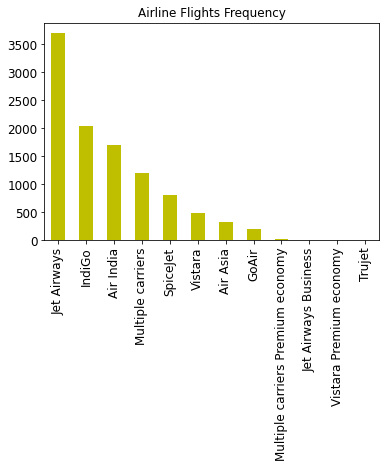

In [30]:
Airline_counts=train.Airline.value_counts()
Airline_counts.plot.bar(rot=90,color='y',fontsize=12,title='Airline Flights Frequency')

In [31]:
sns.set()

Text(0.5, 1.0, 'Airline vs Price')

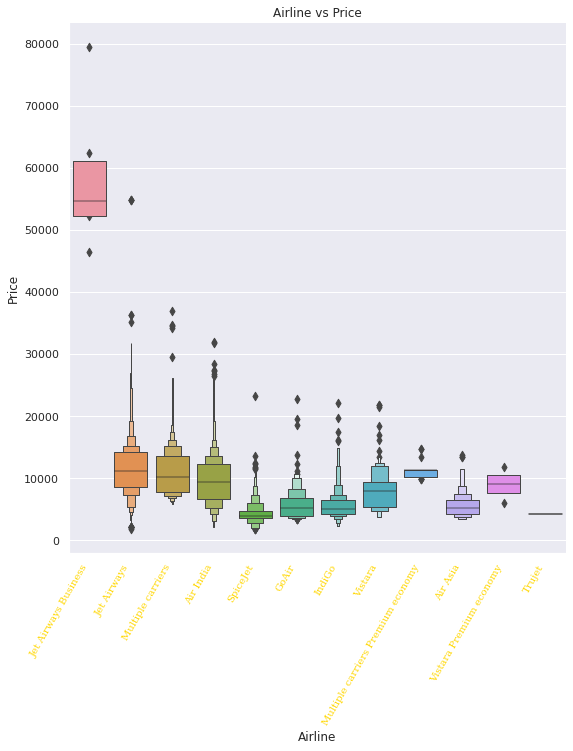

In [32]:
# plt.figure(figsize=(12,12))

#visualizing airline vs price

a=sns.catplot(x='Airline',y='Price',data=train.sort_values(by=["Price"],ascending=False),
              kind='boxen',height=8,aspect=1)
a.set_xticklabels(rotation=60,fontsize=10,color='gold',horizontalalignment='right',fontfamily='serif')
plt.title("Airline vs Price")


In [33]:
# converting airlines into OHE as they are categorical feature
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
transformed_airline=ohe.fit_transform(train[['Airline']])
ohe_df=pd.DataFrame(transformed_airline,columns=ohe.categories_[0])
ohe_df

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10458,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10459,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
ohe.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object)]

In [35]:
#as we have dropped some rows in train, therefore our index(row) are not in continous order
#before concatenation we need to have same indices
train.reset_index(inplace = True, drop = True) 

In [36]:
train.shape,ohe_df.shape

((10462, 14), (10462, 12))

In [37]:
train=pd.concat([train,ohe_df],axis=1)

In [38]:
# ##doing ohe using pd.get_dummies()
# ohe = pd.get_dummies(train.Airline)
# ohe

In [39]:
train.shape

(10462, 26)

In [40]:
train.drop("Airline",axis=1,inplace=True)

In [41]:
train.shape

(10462, 25)

#### Source Feature

Text(0.5, 1.0, 'Source vs Price')

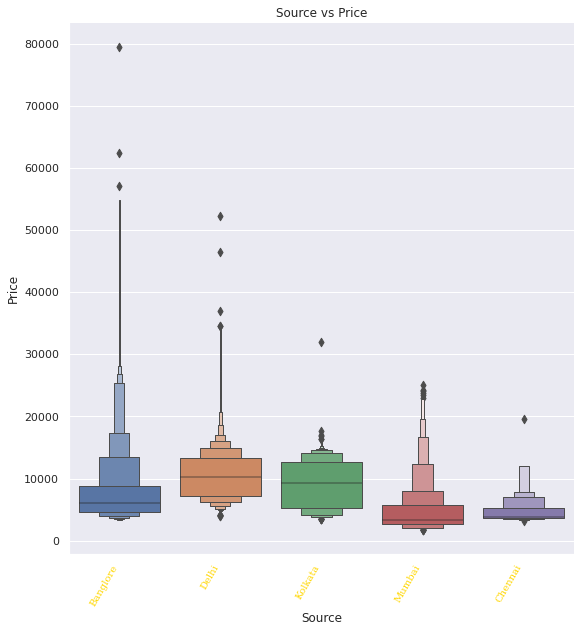

In [42]:
#source vs price
a=sns.catplot(x='Source',y='Price',data=train.sort_values(by=["Price"],ascending=False),
              kind='boxen',height=8,aspect=1)
a.set_xticklabels(rotation=60,fontsize=10,color='gold',horizontalalignment='right',fontfamily='serif')
plt.title("Source vs Price")

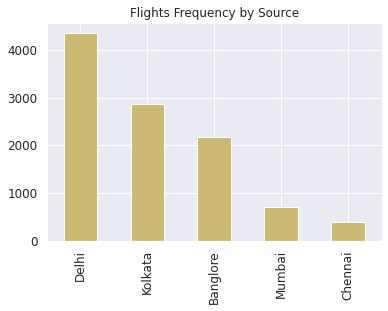

In [43]:
#source frequency
train.Source.value_counts().plot.bar(rot=90,color='y',fontsize=12,title='Flights Frequency by Source')

In [44]:
transformed_source=ohe.fit_transform(train[['Source']])
col_names= ["Source "+ s for s in ohe.categories_[0]]
ohe_df=pd.DataFrame(transformed_source,columns=col_names)
train=pd.concat([train,ohe_df],axis=1)
train.drop('Source',axis=1,inplace=True)
train.shape,ohe_df.shape

((10462, 29), (10462, 5))

In [45]:
train.head()

,Destination,Route,Total_Stops,Additional_Info,Price,JourneyDate,JourneyMonth,DepartureHour,DepartureMin,ArrivalMin,ArrivalHour,Total_Duration,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source Banglore,Source Chennai,Source Delhi,Source Kolkata,Source Mumbai
0,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,10,1,170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,15,13,445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,25,4,1140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,30,23,325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,35,21,285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Destination 

Text(0.5, 1.0, 'Destination vs Price')

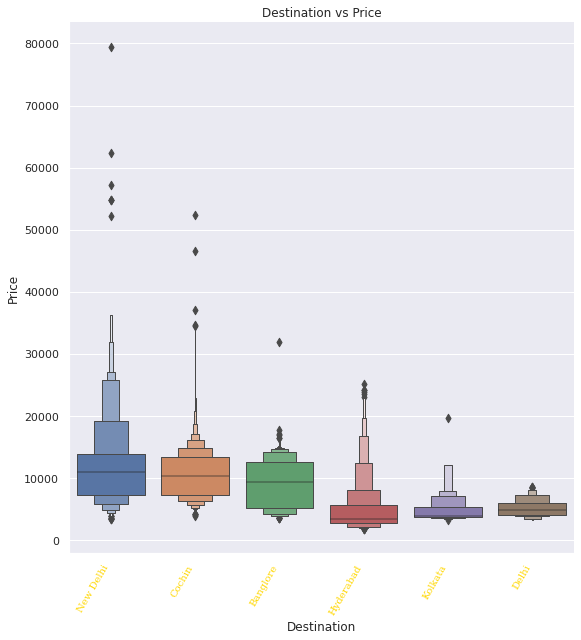

In [46]:
#destination vs price
a=sns.catplot(x='Destination',y='Price',data=train.sort_values(by=["Price"],ascending=False),
              kind='boxen',height=8,aspect=1)
a.set_xticklabels(rotation=60,fontsize=10,color='gold',horizontalalignment='right',fontfamily='serif')
plt.title("Destination vs Price")

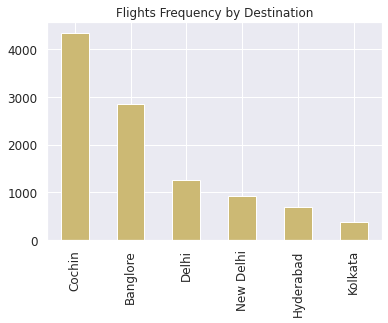

In [47]:
#source frequency
train.Destination.value_counts().plot.bar(rot=90,color='y',fontsize=12,
                                          title='Flights Frequency by Destination')

In [48]:
transformed_destination=ohe.fit_transform(train[['Destination']])
col_names= ["Destination "+ s for s in ohe.categories_[0]]
ohe_df=pd.DataFrame(transformed_destination,columns=col_names)
train=pd.concat([train,ohe_df],axis=1)
train.drop('Destination',axis=1,inplace=True)
train.shape,ohe_df.shape

((10462, 34), (10462, 6))

#### Additional Info feature

In [49]:
train.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
train.Additional_Info.replace({'No Info': 'No info'},inplace=True)

In [51]:
train.Additional_Info.replace({'1 Long layover': 'Other','Change airports': 'Other',
                              'Business class': 'Other','Red-eye flight': 'Other',
                              '1 Short layover':'Other','2 Long layover':'Other'},inplace=True)

In [52]:
train.Additional_Info.value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
Other                             33
Name: Additional_Info, dtype: int64

In [53]:
total_count_of_additional_info=train.Additional_Info.value_counts().sum()
train.Additional_Info.value_counts()*100/total_count_of_additional_info

No info                         78.235519
In-flight meal not included     18.409482
No check-in baggage included     3.039572
Other                            0.315427
Name: Additional_Info, dtype: float64

In [54]:
# Additional_Info contains contains 78% no_info
# Route and Total_Stops are related to each other
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [55]:
#preprocessing test data
test['JourneyDate']=pd.to_datetime(test.Date_of_Journey).dt.day
test['JourneyMonth']=pd.to_datetime(test.Date_of_Journey).dt.month
test.drop('Date_of_Journey',axis=1,inplace=True)

# Departure and Arival

test['DepartureHour']=pd.to_datetime(test.Dep_Time).dt.hour
test['DepartureMin']=pd.to_datetime(test.Dep_Time).dt.minute

test['ArrivalMin']=pd.to_datetime(test.Arrival_Time).dt.minute
test['ArrivalHour']=pd.to_datetime(test.Arrival_Time).dt.hour

test.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

#total duration
test['DurationHour']=test.Duration.str.split(" ").str[0].apply(convert_DurationTo_Hour).astype(int)
test['DurationMinutes']=test.Duration.str.split(" ").str[1].str.replace('m','')
test.DurationMinutes.fillna(0,inplace=True)
test.DurationMinutes=test.DurationMinutes.astype(int)
test['Total_Duration']=(test.DurationHour*60)+test.DurationMinutes
test.drop(['Duration','DurationHour','DurationMinutes'],axis=1,inplace=True)

#stops
test.Total_Stops.replace(replace_values,inplace=True)

#Airline
transformed_airline=ohe.fit_transform(test[['Airline']])
ohe_df=pd.DataFrame(transformed_airline,columns=ohe.categories_[0])
test=pd.concat([test,ohe_df],axis=1)
test.drop("Airline",axis=1,inplace=True)

#source
transformed_source=ohe.fit_transform(test[['Source']])
col_names= ["Source "+ s for s in ohe.categories_[0]]
ohe_df=pd.DataFrame(transformed_source,columns=col_names)
test=pd.concat([test,ohe_df],axis=1)
test.drop('Source',axis=1,inplace=True)

#destination
transformed_destination=ohe.fit_transform(test[['Destination']])
col_names= ["Destination "+ s for s in ohe.categories_[0]]
ohe_df=pd.DataFrame(transformed_destination,columns=col_names)
test=pd.concat([test,ohe_df],axis=1)
test.drop('Destination',axis=1,inplace=True)

#additional info
test.Additional_Info.replace({'No Info': 'No info'},inplace=True)
test.Additional_Info.replace({'1 Long layover': 'Other','Change airports': 'Other',
                              'Business class': 'Other','Red-eye flight': 'Other',
                              '1 Short layover':'Other','2 Long layover':'Other'},inplace=True)

test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [56]:
test.shape

(2671, 30)

In [57]:
test.head()

,Total_Stops,JourneyDate,JourneyMonth,DepartureHour,DepartureMin,ArrivalMin,ArrivalHour,Total_Duration,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source Banglore,Source Chennai,Source Delhi,Source Kolkata,Source Mumbai,Destination Banglore,Destination Cochin,Destination Delhi,Destination Hyderabad,Destination Kolkata,Destination New Delhi
0,1,6,6,17,30,25,4,655,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,5,12,6,20,20,10,240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,21,5,19,15,0,19,1425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,21,5,8,0,0,21,780,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,24,6,23,55,45,2,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Feature Selection
``1. Univariate Selection``
``2. Feature Importance``
``3.Correlation Matrix with Heatmap``

In [58]:
X=train.drop('Price',axis=1)
Y=train.Price
train.shape,X.shape,Y.shape

((10462, 32), (10462, 31), (10462,))

### Univariate Selection


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [60]:
#apply SelectKBest class to extract  best features
bestfeatures = SelectKBest(score_func=mutual_info_regression, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)*10
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.sort_values("Score",ascending=False))  

                             Features      Score
7                      Total_Duration  17.261555
6                         ArrivalHour  11.317438
3                       DepartureHour   9.017370
5                          ArrivalMin   8.991465
0                         Total_Stops   7.535753
4                        DepartureMin   7.457533
1                         JourneyDate   6.110578
12                        Jet Airways   5.439887
22                       Source Delhi   5.166443
26                 Destination Cochin   5.137141
23                     Source Kolkata   4.691221
25               Destination Banglore   4.575623
2                        JourneyMonth   4.102858
20                    Source Banglore   3.953616
11                             IndiGo   3.603501
27                  Destination Delhi   3.267804
9                           Air India   2.903807
14                  Multiple carriers   2.757138
16                           SpiceJet   2.094203
24                  

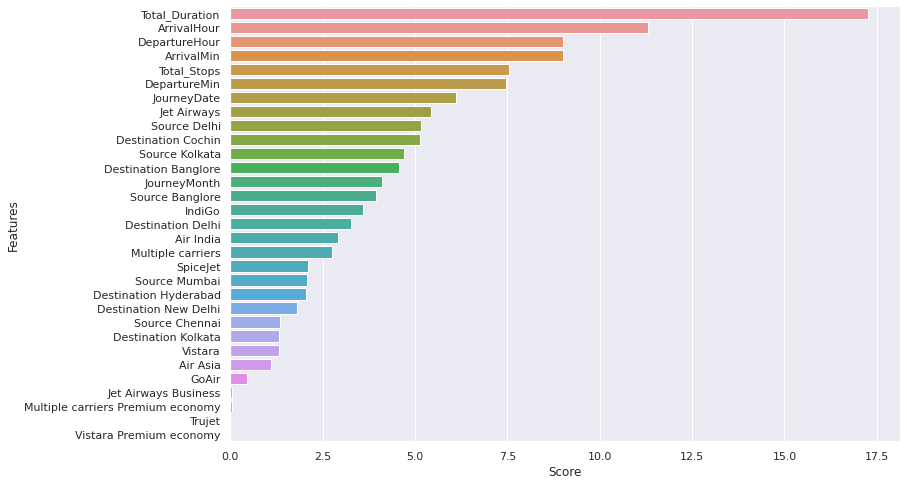

In [61]:
plt.figure(figsize = (12,8))
sns.barplot(y='Features',x='Score',data=featureScores.sort_values("Score",ascending=False),orient='h')

#### Feature Importance
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=12)

model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=12, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [63]:
print(model.feature_importances_)

[5.08079646e-02 1.48825352e-01 1.26471547e-01 7.47023574e-02
 7.30005714e-02 7.06862043e-02 8.15405097e-02 8.13952818e-02
 1.35629712e-02 2.70107872e-02 4.77646704e-03 3.91755664e-02
 4.28114076e-02 1.55658510e-04 5.61654259e-03 4.36878448e-04
 2.50365436e-02 1.03534544e-04 2.26491388e-02 3.29702018e-04
 9.58614874e-03 5.59333978e-03 9.28734243e-03 1.22672431e-02
 8.98682332e-03 1.27722811e-02 8.85186271e-03 2.00240984e-02
 8.23526922e-03 6.09008373e-03 9.21052126e-03]


In [64]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances*100

JourneyDate                          14.882535
JourneyMonth                         12.647155
ArrivalHour                           8.154051
Total_Duration                        8.139528
DepartureHour                         7.470236
DepartureMin                          7.300057
ArrivalMin                            7.068620
Total_Stops                           5.080796
Jet Airways                           4.281141
IndiGo                                3.917557
Air India                             2.701079
SpiceJet                              2.503654
Vistara                               2.264914
Destination Delhi                     2.002410
Air Asia                              1.356297
Destination Banglore                  1.277228
Source Kolkata                        1.226724
Source Banglore                       0.958615
Source Delhi                          0.928734
Destination New Delhi                 0.921052
Source Mumbai                         0.898682
Destination C

In [65]:
# feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
#                                     'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# # count the selected times for each feature
# feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# # display the top 100
# feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
# feature_selection_df.index = range(1, len(feature_selection_df)+1)
# feature_selection_df.head(num_feats)

#### Heatmap

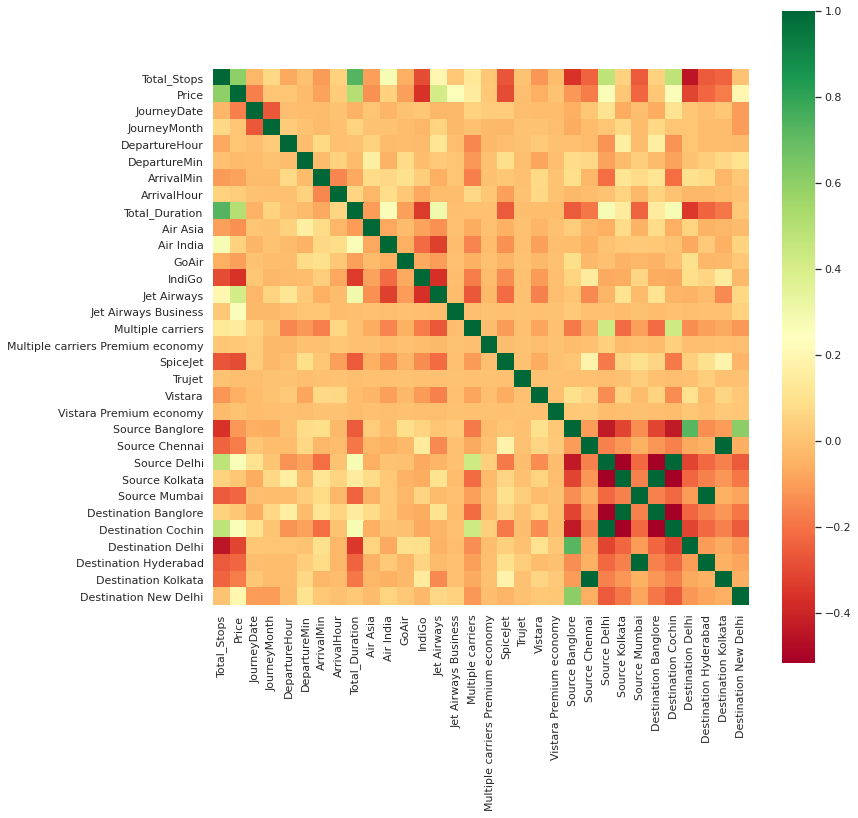

In [66]:
corr_df=train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_df,cmap="RdYlGn",square=True)

## Model

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [69]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7846, 31), (2616, 31), (7846,), (2616,))

**Linear regression**

In [93]:
from sklearn.linear_model import LinearRegression as LR

In [94]:
lin_reg=LR()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_test,Y_test)

0.5832534890564802

# RandomForestRegressor

In [70]:
Rf_reg = RandomForestRegressor()
Rf_reg.fit(X_train, Y_train)

Y_rf_pred = Rf_reg.predict(X_test)

In [71]:
print("score on train data:")
print(Rf_reg.score(X_train,Y_train))
print("score on test data:")
print(Rf_reg.score(X_test,Y_test))

score on train data:
0.9549199383688123
score on test data:
0.7813844145260328


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


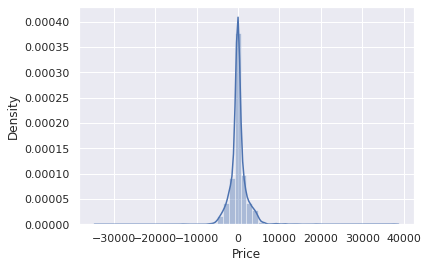

In [72]:
sns.distplot(Y_test-Y_rf_pred)
plt.show()

#### Hyperparameter tuning

In [73]:
# #Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 15)]

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 50]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 6, 8, 10]


# grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}


In [74]:
# # Random search of parameters, using 5 fold cross test, 
# # search across 100 different combinations
# rf_random =GridSearchCV(estimator = Rf_reg, param_grid = grid,
#                                scoring='neg_mean_squared_error', 
#                                 cv = 5)


In [75]:
# rf_random.fit(X_train,Y_train)
# Y_rf_grid_pred=rf_random.predict(X_test)
# rf_random.best_params_

In [76]:
# sns.distplot(Y_test-rf_random_pred)
# plt.show()

In [77]:
# #best rf
# Rf_reg = RandomForestRegressor(n_estimators= 1000,
#  min_samples_split= 10,
#  min_samples_leaf= 1,
#  max_features='auto',
#  max_depth=16)
# Rf_reg.fit(X_train, Y_train)

In [78]:
print("score on test data:")
Rf_reg.score(X_test,Y_test)

score on test data:


0.7813844145260328

# KNN Regressor

In [79]:
k_values = list(range(1, 30,2))

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,Y_train)
    print("k=",k,"score on test is ",knn.score(X_test,Y_test))

k= 1 score on test is  0.3893764051678249
k= 3 score on test is  0.5213272062813865
k= 5 score on test is  0.5483436083399404
k= 7 score on test is  0.5518138102175114
k= 9 score on test is  0.5423360050896625
k= 11 score on test is  0.540491105830607
k= 13 score on test is  0.5336056640501718
k= 15 score on test is  0.5309802063183662
k= 17 score on test is  0.5256264135077036
k= 19 score on test is  0.5199236328217957
k= 21 score on test is  0.514945134416075
k= 23 score on test is  0.5116655109934265
k= 25 score on test is  0.5082486665353328
k= 27 score on test is  0.5029715701655364
k= 29 score on test is  0.5016261114720333


In [91]:
##best knn is 
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,Y_train)
print("k=",7,"score on test is ",knn.score(X_test,Y_test))

k= 7 score on test is  0.5518138102175114


# Decision Tree Regressor

In [81]:
depth  =list(range(3,30))
min_samples_=list(range(2, 10))
param_grid =dict(max_depth=depth,min_samples_split=min_samples_)
dt_regressor =GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid,cv =5)
dt_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 2

In [82]:
# Y_dt_train_pred =dt_regressor.predict(X_train)  ##Predict train result
# Y_dt_val_pred =dt_regressor.predict(X_test)  ##Predict test result

In [83]:
# print('For train :Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_train, Y_dt_train_pred)))

# print('For test :Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, Y_dt_val_pred)))

# print('Val Percentage error:', np.mean(np.abs(Y_validation-Y_dt_val_pred)/Y_validation)*100)

In [84]:
dt_regressor.score(X_test,Y_test)

0.7742538209903793

# SVR

In [85]:
# param_svr = {'kernel' : ('linear', 'rbf','poly','sigmoid'),
#          'C' : [1,10,100,0.1,0.001],
#          'degree' : [3,8],
# #          'coef0' : [0.01,0.1,10,100],
#          'gamma' : ('auto','scale')}

# svr_regressor=GridSearchCV(SVR(),param_svr,cv =5)

svr_regressor=SVR()
svr_regressor.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [86]:
svr_regressor.score(X_test, Y_test)

0.1510510093427314

# GradientBoostingRegressor

In [88]:
gbm = GradientBoostingRegressor()
# best_gbm = GridSearchCV(gbm, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],
#                                          'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)
# best_
gbm.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
# best_
gbm.score(X_test, Y_test)

0.7585854679466719

# Final Model

In [103]:
#model
#comparing accuracies
m=[gbm,knn,dt_regressor,svr_regressor,Rf_reg,lin_reg]
for i in m:
  print("regressor :",str(type(i)).split(".")[-1][:-2],"score on validation data", i.score(X_test,Y_test))

regressor : GradientBoostingRegressor score on validation data 0.7585854679466719
regressor : KNeighborsRegressor score on validation data 0.5518138102175114
regressor : GridSearchCV score on validation data 0.7742538209903793
regressor : SVR score on validation data 0.1510510093427314
regressor : RandomForestRegressor score on validation data 0.7813844145260328
regressor : LinearRegression score on validation data 0.5832534890564802


### we see that random forest has highest accuracy

In [106]:
model=Rf_reg

In [107]:
import pickle

In [108]:
# open  file
file = open('flight_model.pkl', 'wb')

# dump information
pickle.dump(model, file)

In [110]:
file= open('flight_model.pkl','rb')
model_from_file = pickle.load(file)

In [111]:
model_from_file.score(X_test,Y_test)

0.7813844145260328